### 주의! 해당 ipynp 파일을 풀어서 제출해주세요.
### 만약 이론 파일이 제출될 경우 위 이론 내용을 다 삭제하고 다시 전체를 재실행하여 채점하오니 참고바랍니다.
### 컴파일이 되지 않는 문제에 한해서 0점 처리됩니다.

<br/><br/><br/><br/>
<h1 style='text-align:center;'>실습 문제

![prob1](./prob1.png)

#### 먼저, 위처럼 M-ary Tree를 networkx 라이브러리를 통해 시각적으로 표현해보자. 

In [1]:
# We already met.
class M_ary_Node:
    def __init__(self, data=None, m=2):
        self.children=[]
        self.m_ary=m
        self.data = data
  
    def add_child(self, data):  
        if self.data!=None:                
            if len(self.children)< self.m_ary:           
                self.children.append(M_ary_Node(data, self.m_ary))
                return 
            else: 
                for i in range(self.m_ary):
                    if (len(self.children[i].children)<self.m_ary):
                        self.children[i].children.append(M_ary_Node(data, self.m_ary))
                        return
                self.children[0].add_child(data)    
        else:
            self.data = data

    def PrintTree(self):
        print(self.data)
        for i in range(len(self.children)):
            self.children[i].PrintTree()        

In [2]:
# Get all edges from the graph
def get_edges(root) :
    edges = []
    if root.data :
        for child in root.children :
            edges.append((root.data, child.data))
            edges = edges + get_edges(child)
    return edges

In [3]:
# Make M-ary tree
M = 3
nodes = [n for n in "abkcglmdefhjino"]
mtree = M_ary_Node(m=M)
for n in nodes : mtree.add_child(n)
edges = get_edges(mtree)

In [4]:
# Drawing codes
import networkx as nx
import matplotlib.pyplot as plt
def draw_graph(graph) :
    plt.figure(figsize=(15, 12))
    pos = nx.spring_layout(graph, scale=3)
    nx.draw_networkx_nodes(graph, pos=pos, node_size=500, node_color='cyan')
    nx.draw_networkx_edges(graph, pos=pos)
    nx.draw_networkx_labels(graph, pos=pos, font_size=15)
    plt.show()

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


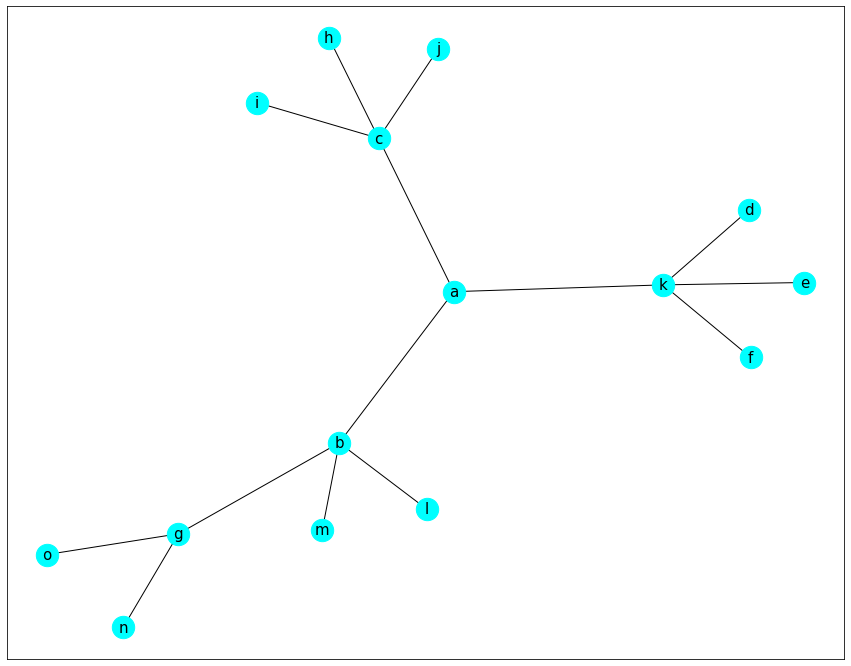

In [5]:
graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)
draw_graph(graph)

##  실습 1.
#### 1부터 100까지 자연수를 노드로 가지는 5-ary Tree를 만들고, 이를 시각적으로 표현해보시오.

<br/>※ 풀이조건
<ol>
    <li>위에서 학습한 M_ary_Node 클래스를 이용하여 트리를 만든다.</li>
    <li>위에서 만든 트리를 출력 예시처럼 시각적으로 표현한다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>자유롭게 프로그래밍 한다.</li>
</ol>

In [6]:
class M_ary_Node:
    def __init__(self, data=None, m=2):
        self.children=[]
        self.m_ary=m
        self.data = data
  
    def add_child(self, data):  
        if self.data!=None:                
            if len(self.children)< self.m_ary:           
                self.children.append(M_ary_Node(data, self.m_ary))
                return 
            else: 
                for i in range(self.m_ary):
                    if (len(self.children[i].children)<self.m_ary):
                        self.children[i].children.append(M_ary_Node(data, self.m_ary))
                        return
                self.children[0].add_child(data)    
        else:
            self.data = data

    def PrintTree(self):
        print(self.data)
        for i in range(len(self.children)):
            self.children[i].PrintTree()

In [7]:
def get_edges(root) :
    edges = []
    if root.data :
        for child in root.children :
            edges.append((root.data, child.data))
            edges = edges + get_edges(child)
    return edges

In [8]:
M = 5
nodes = [str(n) for n in range(1, 101, 1)]
mtree = M_ary_Node(m=M)
for n in nodes : mtree.add_child(n)
edges = get_edges(mtree)

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
def draw_graph(graph) :
    plt.figure(figsize=(15, 12))
    pos = nx.spring_layout(graph, scale=3)
    nx.draw_networkx_nodes(graph, pos=pos, node_size=500, node_color='skyblue')
    nx.draw_networkx_edges(graph, pos=pos)
    nx.draw_networkx_labels(graph, pos=pos, font_size=15)
    plt.show()

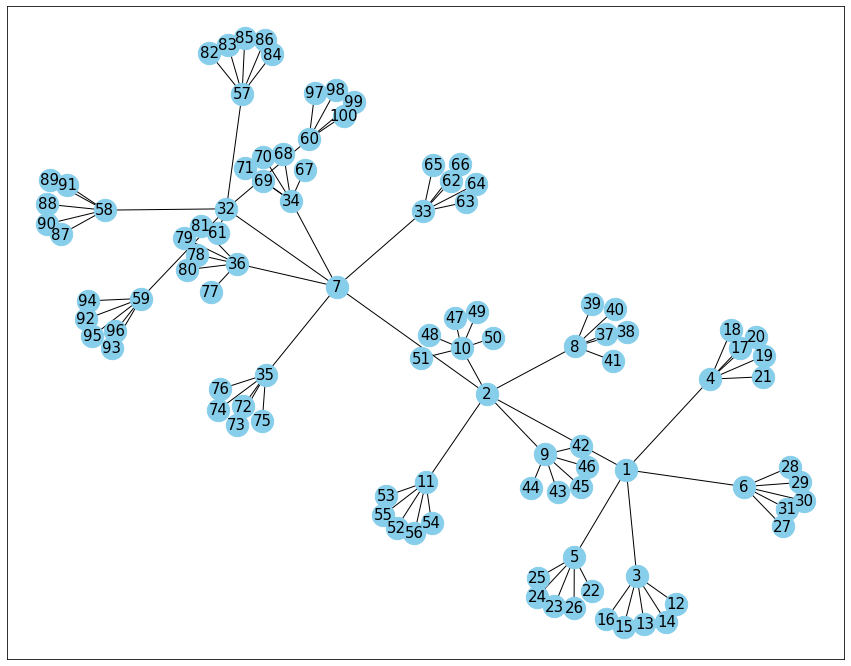

In [10]:
graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)
draw_graph(graph)

#### 출력예시
![prob2](./prob2.png)

##  실습 2.
#### 위에서 구한 5-ary 그래프의 깊이를 출력하시오.

<br/>※ 풀이조건
<ol>
    <li>위에서 학습한 깊이 구하는 함수를 M-ary tree 형식에 맞춰 변형하여 <b>만들어</b> 푼다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>코드 내 import를 사용할 경우 0점 처리한다. <b>주의하도록 한다.</b> </li>
    <li>위 사항 외에 자유롭게 프로그래밍 한다.</li>
</ol>

In [11]:
def MAry_depth(root, length=0):
    data = []
    if root :
        for i in range(len(root.children)):
            data.append(MAry_depth(root.children[i], length + 1))
        if len(data) != 0:
            tree_depth = max(data)
            return tree_depth
        else:
            return length

In [12]:
MAry_depth(mtree)

5

##  실습 3
#### 위에서 구한 그래프에서 preorder, inorder, postorder 방법으로 각각 순회했을 때 '100'인 노드를 몇 번째로 방문하는 지 구하시오. 
#### 단, 처음 방문하는 노드를 1번째로 방문한다고 한다.

<br/>※ 풀이조건
<ol>
    <li>아래 입력 예시 및 출력 예시를 참고한다.</li>
    <li>위 클래스를 알맞게 변형해도 된다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>코드 내 import를 사용할 경우 0점 처리한다. <b>주의하도록 한다.</b> </li>
    <li>위 사항 외에 자유롭게 프로그래밍 한다.</li>
</ol>

#### 입력 예시

#### 출력 예시

In [13]:
def PreorderTraversal(root):
    res = []
    if root:
        res.append(root.data)
        for i in range(len(root.children)):
            res = res + PreorderTraversal(root.children[i])
    return res

def PostorderTraversal(root):
    res = []
    if root:
        for i in range(len(root.children)):
            res = res + PostorderTraversal(root.children[i])
        res.append(root.data)
    return res    

def lnorderTraversal(root):
    res = []
    if root:
        if len(root.children)!=0:           
            res = res + lnorderTraversal(root.children[0])
        res.append(root.data)
        for i in range(1, len(root.children)):
            res = res + lnorderTraversal(root.children[i])  
    return res

In [14]:
n = input()
print("Pre-Order :", PreorderTraversal(mtree).index(n)+1)
print("Post-Order :", PostorderTraversal(mtree).index(n)+1)
print("ln-Order :", lnorderTraversal(mtree).index(n)+1)

100
Pre-Order : 27
Post-Order : 22
ln-Order : 24


##  실습 4
<h4 style="line-height:2em"> 1부터 1000까지 자연수를 노드로 가지는 binary Tree (이진 트리)를 위 M-ary 클래스를 통해 만들고 preorder, inorder, postorder 방법으로 각각 순회했을 때 '512'인 노드가 몇 번째로 방문하는 지 구하시오.</h4>

#### 만약 방문 횟수를 더 줄일 방안이 있다면, 조원들과 상의하여 '아이디어'를 설명한 글을 출력하시오.

<br/>※ 풀이조건
<ol>
    <li>위에서 학습한 <b>M-ary 클래스를 통해</b> 이진 트리를 만든다.</li>
    <li>'512' 노드를 찾을 때 더 적게 노드들을 방문하기 위해 어떤 트리 구조를 사용하는 지, 어떤 방법을 사용하는 지 등 자유롭게 아이디어를 제시한다.</li>
    <li>위 아이디어는 구현하지 않아도 된다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>코드 내 import를 사용할 경우 0점 처리한다. <b>주의하도록 한다.</b> </li>
    <li>몇 번째로 방문하는 지 올바르게 출력하고 아이디어를 기술하면 정답처리한다.</li>
    <li>아이디어가 왜 방문 횟수가 적을 지 쓰지 않았다면 0.5점 감점한다.</li>
    <li>실제로 생각한 아이디어가 <b>방문 횟수가 더 많아도 나름 열심히 논리적으로 기술했다면</b> 정답처리한다.</li>
</ol>

In [15]:
class B_Tree_Node:
    def __init__(self, data=None, m=2):
        self.children=[]
        self.b_tree=m
        self.data = data
  
    def add_child(self, data):  
        if self.data!=None:                
            if len(self.children)< self.b_tree:           
                self.children.append(B_Tree_Node(data, self.b_tree))
                return 
            else: 
                for i in range(self.b_tree):
                    if (len(self.children[i].children)<self.b_tree):
                        self.children[i].children.append(M_ary_Node(data, self.b_tree))
                        return
                self.children[0].add_child(data)    
        else:
            self.data = data

    def PrintTree(self):
        print(self.data)
        for i in range(len(self.children)):
            self.children[i].PrintTree()

In [16]:
def get_edges(root) :
    edges = []
    if root.data :
        for child in root.children :
            edges.append((root.data, child.data))
            edges = edges + get_edges(child)
    return edges

In [17]:
M = 2
nodes = [str(n) for n in range(1, 1001, 1)]
b_tree = B_Tree_Node(m=M)
for n in nodes : b_tree.add_child(n)
edges = get_edges(b_tree)

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph) :
    plt.figure(figsize=(15, 12))
    pos = nx.spring_layout(graph, scale=3)
    nx.draw_networkx_nodes(graph, pos=pos, node_size=500, node_color='skyblue')
    nx.draw_networkx_edges(graph, pos=pos)
    nx.draw_networkx_labels(graph, pos=pos, font_size=15)
    plt.show()

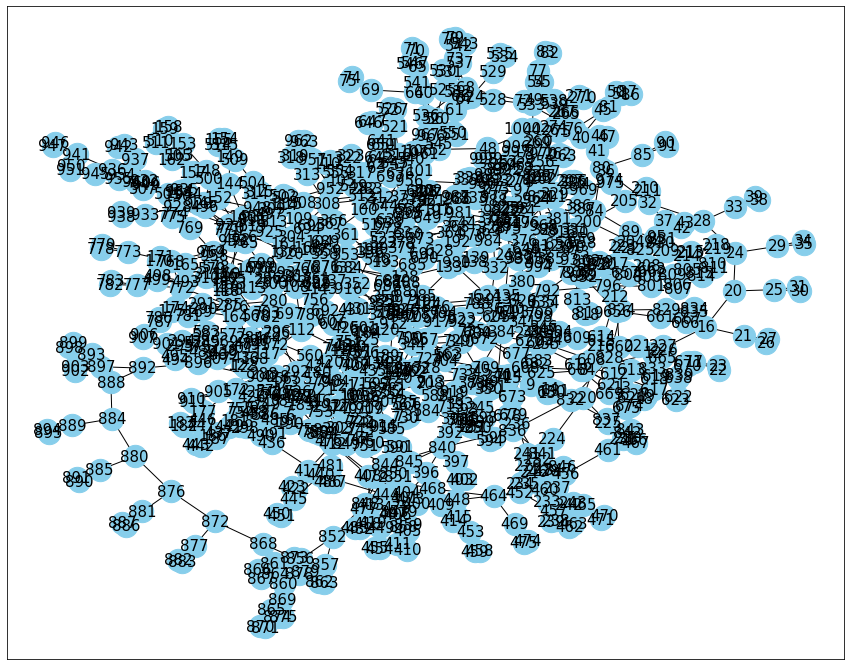

In [19]:
graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)
draw_graph(graph)

In [20]:
def PreorderTraversal(root):
    res = []
    if root:
        res.append(root.data)
        for i in range(len(root.children)):
            res = res + PreorderTraversal(root.children[i])
    return res

def PostorderTraversal(root):
    res = []
    if root:
        for i in range(len(root.children)):
            res = res + PostorderTraversal(root.children[i])
        res.append(root.data)
    return res    

def lnorderTraversal(root):
    res = []
    if root:
        if len(root.children)!=0:           
            res = res + lnorderTraversal(root.children[0])
        res.append(root.data)
        for i in range(1, len(root.children)):
            res = res + lnorderTraversal(root.children[i])  
    return res

In [23]:
n = input()
print("Pre-Order : ", PreorderTraversal(b_tree).index(n)+1)
print("Post-Order : ", PostorderTraversal(b_tree).index(n)+1)
print("ln-Order : ", lnorderTraversal(b_tree).index(n)+1)

512
Pre-Order :  130
Post-Order :  484
ln-Order :  481
